In [1]:
import pandas as pd
import numpy as np
#graficas
import seaborn as sns
import plotly.express as px
from pylab import rcParams

#estandarizacion de variables
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

#k means, cluster de periodos
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#modelo
import statsmodels.api as sm

In [2]:
df = pd.read_excel("GDP España Dataset.xlsx")
df

,,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,1995T1,109165,69638,18762,23075,23894,26204
1,1995T2,116633,68678,21271,27616,26209,27141
2,1995T3,112398,69078,18687,24542,24721,24630
3,1995T4,122392,73512,22407,28486,25709,27722
4,1996T1,115776,73098,19699,24743,25705,27469
...,...,...,...,...,...,...,...
101,2020T2,251187,133094,63429,50439,69256,65031
102,2020T3,282149,162792,56383,58131,85498,80655
103,2020T4,299307,160817,69091,64717,93177,88495
104,2021T1,279459,159617,58975,58631,90843,88607


## PREPROCESAMIENTO

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0                                                           106 non-null    object
 1       Producto interior bruto a precios de mercado        106 non-null    int64 
 2       Gasto en consumo final de los hogares y las ISFLSH  106 non-null    int64 
 3       Gasto en consumo final de las AAPP                  106 non-null    int64 
 4       Formación bruta de capital                          106 non-null    int64 
 5       Exportaciones de bienes y servicios                 106 non-null    int64 
 6       Importaciones de bienes y servicios                 106 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.9+ KB


In [4]:
df.rename(columns = { df.columns[0] : "Año/Trimestre"}, inplace=True)

In [5]:
df.head()

,Año/Trimestre,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,1995T1,109165,69638,18762,23075,23894,26204
1,1995T2,116633,68678,21271,27616,26209,27141
2,1995T3,112398,69078,18687,24542,24721,24630
3,1995T4,122392,73512,22407,28486,25709,27722
4,1996T1,115776,73098,19699,24743,25705,27469


In [6]:
df.shape

(106, 7)

In [7]:
df.describe()

,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,229134.707547,133619.471698,42982.169811,52976.783019,66870.528302,67314.245283
std,60544.165137,33720.245178,14087.496989,15230.289564,24458.281587,21093.866241
min,109165.000000,68678.000000,18687.000000,23075.000000,23894.000000,24630.000000
25%,176782.750000,104818.750000,29209.750000,44443.750000,48450.500000,52822.000000
50%,254472.500000,149735.000000,47503.000000,52680.500000,65452.500000,73480.500000
75%,273343.000000,159164.000000,54685.000000,62683.000000,86576.750000,82540.750000
max,324228.000000,181153.000000,69091.000000,90140.000000,112996.000000,101639.000000


In [8]:
import matplotlib.pyplot as plt
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

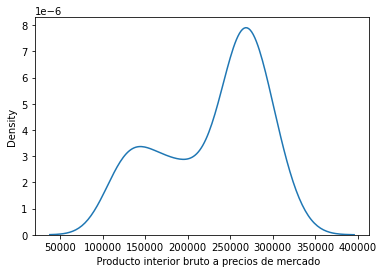

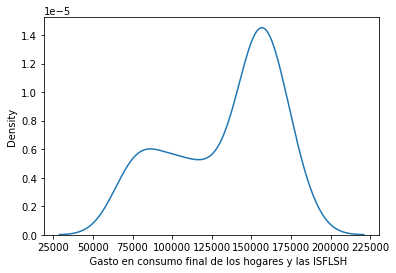

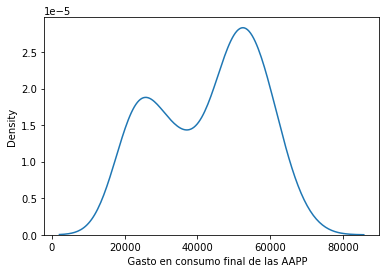

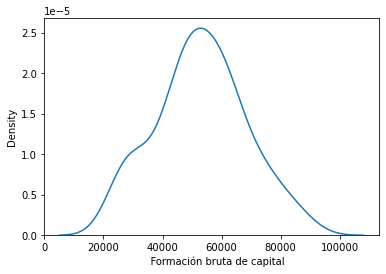

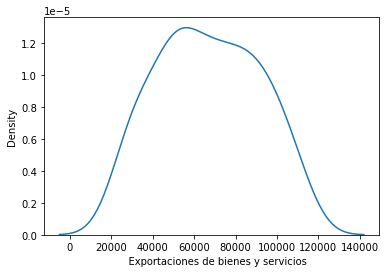

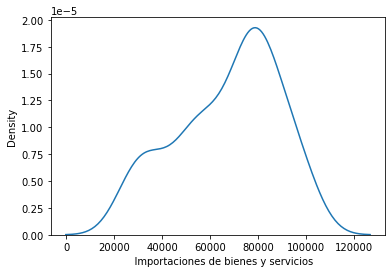

In [9]:
for i in df.columns[1:]:
    sns.kdeplot(df[i])
    plt.show()
    
#el producto y el gasto nacional se mueven idénticamente    

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


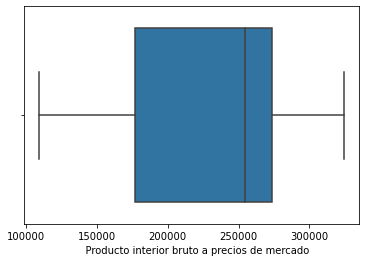

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


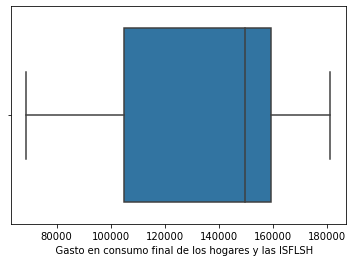

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


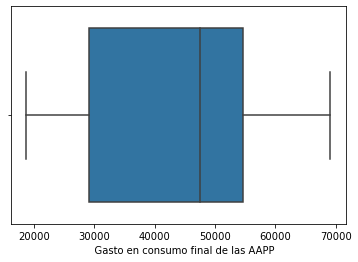

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


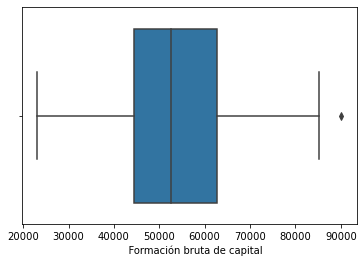

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


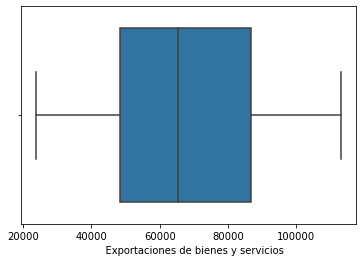

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


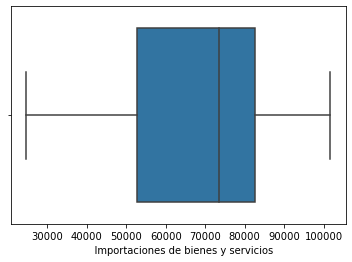

In [10]:
#vemos outliers

for i in df.columns[1:]:
    sns.boxplot(df[i])
    plt.show()
    

Numero de columnas: 7

Producto interno bruto: ingreso naiconal

Gasto en consumo de los hogares t las ISFLSH: Consumo Privado

Gasto en consumo de las AAPP: Consumo Publico

Formacion bruta de cpaital: K Fijo

Exportaciones

Importacionesa

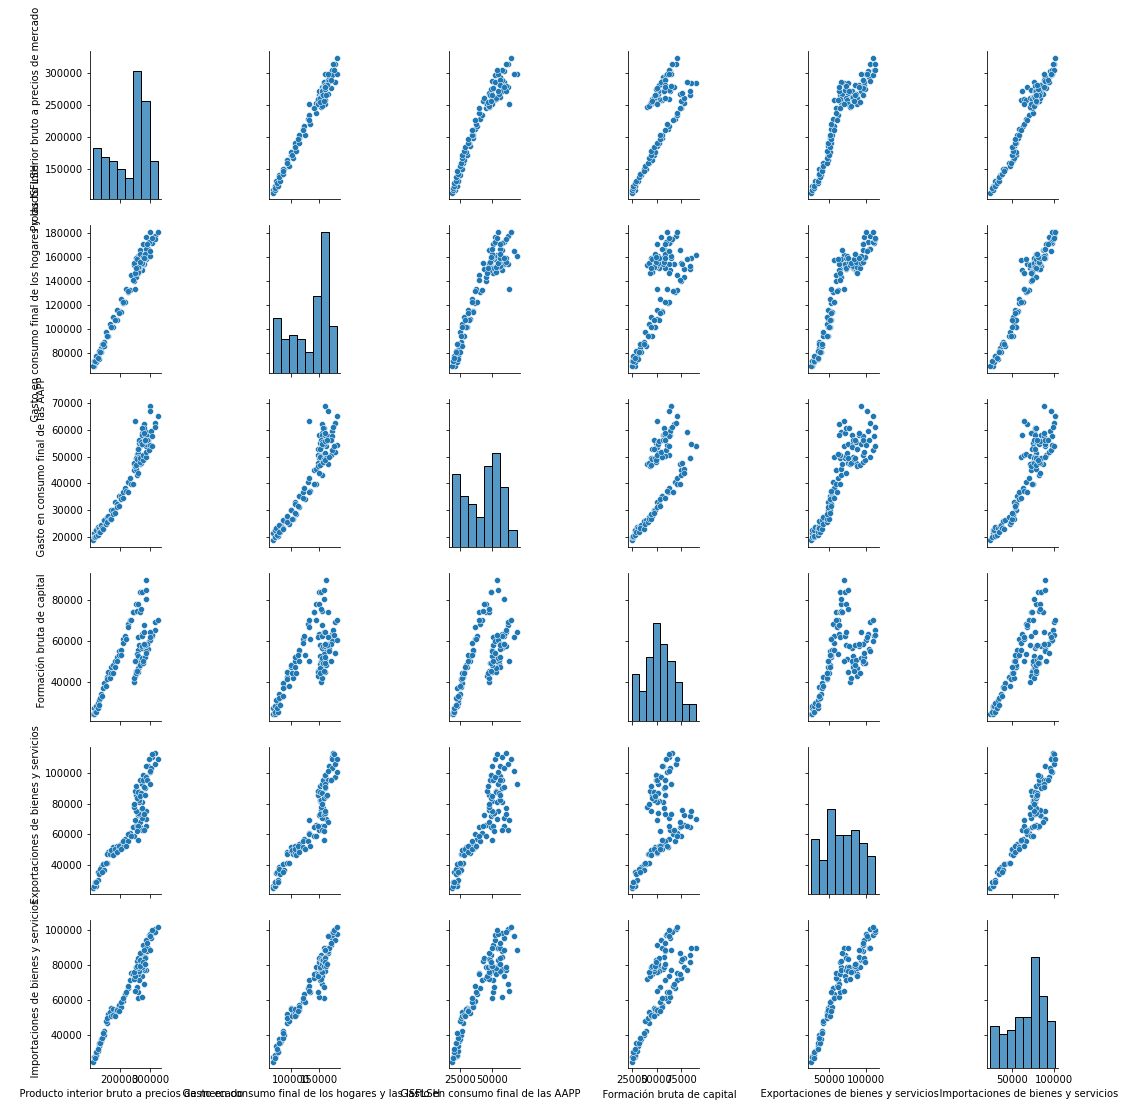

In [11]:
sns.pairplot(df[1:])


<AxesSubplot:>

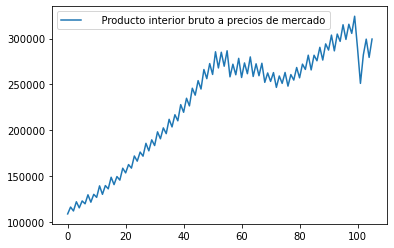

In [12]:
df.iloc[:,1:2].plot()

C:\Users\leona\AppData\Local\Temp/ipykernel_8560/3768763790.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


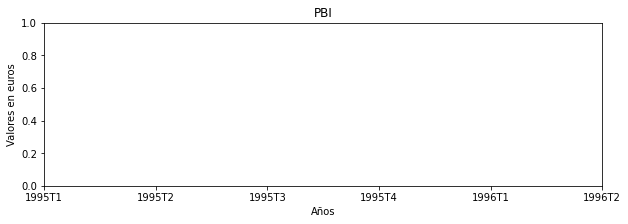

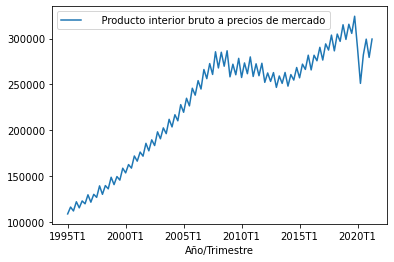

In [13]:
fig, ax1 = plt.subplots(figsize=(10,3))
serie = df.iloc[:,1:2]
serie.index=df["Año/Trimestre"]
labels =serie.index
ax1.set_title("PBI") #titulo
ax1.set_xlabel('Años') #nombre del eje x
ax1.set_ylabel('Valores en euros') #nombre del eje y
ax1.set_xticklabels(labels)
serie.plot()
plt.savefig("SERIE.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

In [14]:
#ESTANDARIZACION DE VARIABLES

scaler = StandardScaler()
df_ = scaler.fit_transform(df.iloc[:,1:])
df_std = pd.DataFrame(df_, columns = ['Producto interior bruto a precios de mercado','Gasto en consumo final de los hogares y las ISFLSH','Gasto en consumo final de las AAPP','Formación bruta de capital','Exportaciones de bienes y servicios','Importaciones de bienes y servicios'])
df_std

,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,-1.990937,-1.906434,-1.727435,-1.972637,-1.765484,-1.958178
1,-1.867003,-1.935039,-1.548487,-1.673065,-1.670383,-1.913546
2,-1.937285,-1.923120,-1.732784,-1.875858,-1.731510,-2.033151
3,-1.771431,-1.791002,-1.467465,-1.615670,-1.690923,-1.885872
4,-1.881226,-1.803338,-1.660606,-1.862598,-1.691087,-1.897923
...,...,...,...,...,...,...
101,0.365965,-0.015657,1.458312,-0.167419,0.097996,-0.108756
102,0.879790,0.869244,0.955776,0.340027,0.765220,0.635452
103,1.164533,0.810395,1.862138,0.774509,1.080675,1.008889
104,0.835148,0.774639,1.140643,0.373012,0.984793,1.014224


In [15]:
df_std.insert(0, "Año/Trimestre", df["Año/Trimestre"].values, allow_duplicates = False)
df_std

,Año/Trimestre,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,1995T1,-1.990937,-1.906434,-1.727435,-1.972637,-1.765484,-1.958178
1,1995T2,-1.867003,-1.935039,-1.548487,-1.673065,-1.670383,-1.913546
2,1995T3,-1.937285,-1.923120,-1.732784,-1.875858,-1.731510,-2.033151
3,1995T4,-1.771431,-1.791002,-1.467465,-1.615670,-1.690923,-1.885872
4,1996T1,-1.881226,-1.803338,-1.660606,-1.862598,-1.691087,-1.897923
...,...,...,...,...,...,...,...
101,2020T2,0.365965,-0.015657,1.458312,-0.167419,0.097996,-0.108756
102,2020T3,0.879790,0.869244,0.955776,0.340027,0.765220,0.635452
103,2020T4,1.164533,0.810395,1.862138,0.774509,1.080675,1.008889
104,2021T1,0.835148,0.774639,1.140643,0.373012,0.984793,1.014224


Hay dos cortes importantes dentro de la serie, vamos a ver si el k means puede identificarlos y trabajar con ellos por separado.

In [16]:
# DEFINIMOS X

X = df_std.drop(["Año/Trimestre"], axis=1).values

In [17]:
inercias = [] 
  
for k in range(1,27): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias


C:\Users\leona\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[636.0,
 184.80714833899447,
 128.73076117520884,
 85.4041342135938,
 58.63040766156719,
 47.79940912754057,
 38.24163997472644,
 32.88264892937772,
 28.076745470304935,
 25.074044485390697,
 23.033459128783104,
 21.472318819143794,
 19.636137996319448,
 18.17688049564658,
 17.167363336785787,
 15.67487437664756,
 15.104844873613462,
 13.725868056479607,
 12.503990568094341,
 12.488876159398895,
 10.766679678569654,
 10.692769718424982,
 9.931249489689343,
 9.373278296035302,
 9.280348942595017,
 8.893693950380165]

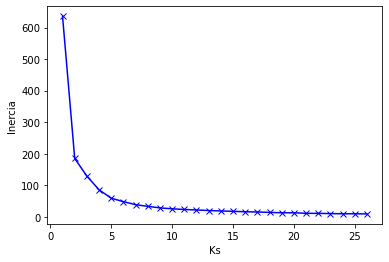

In [18]:
# VERIFICO LAS AGRUPACIONES A HACER


plt.plot(range(1,27), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [19]:
# PROBAMOS COMO RESULTA CON 2 CLUSTERS

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
df["Clusters = 2"] = kmeans.labels_

In [21]:
df_2clusters = df.copy()

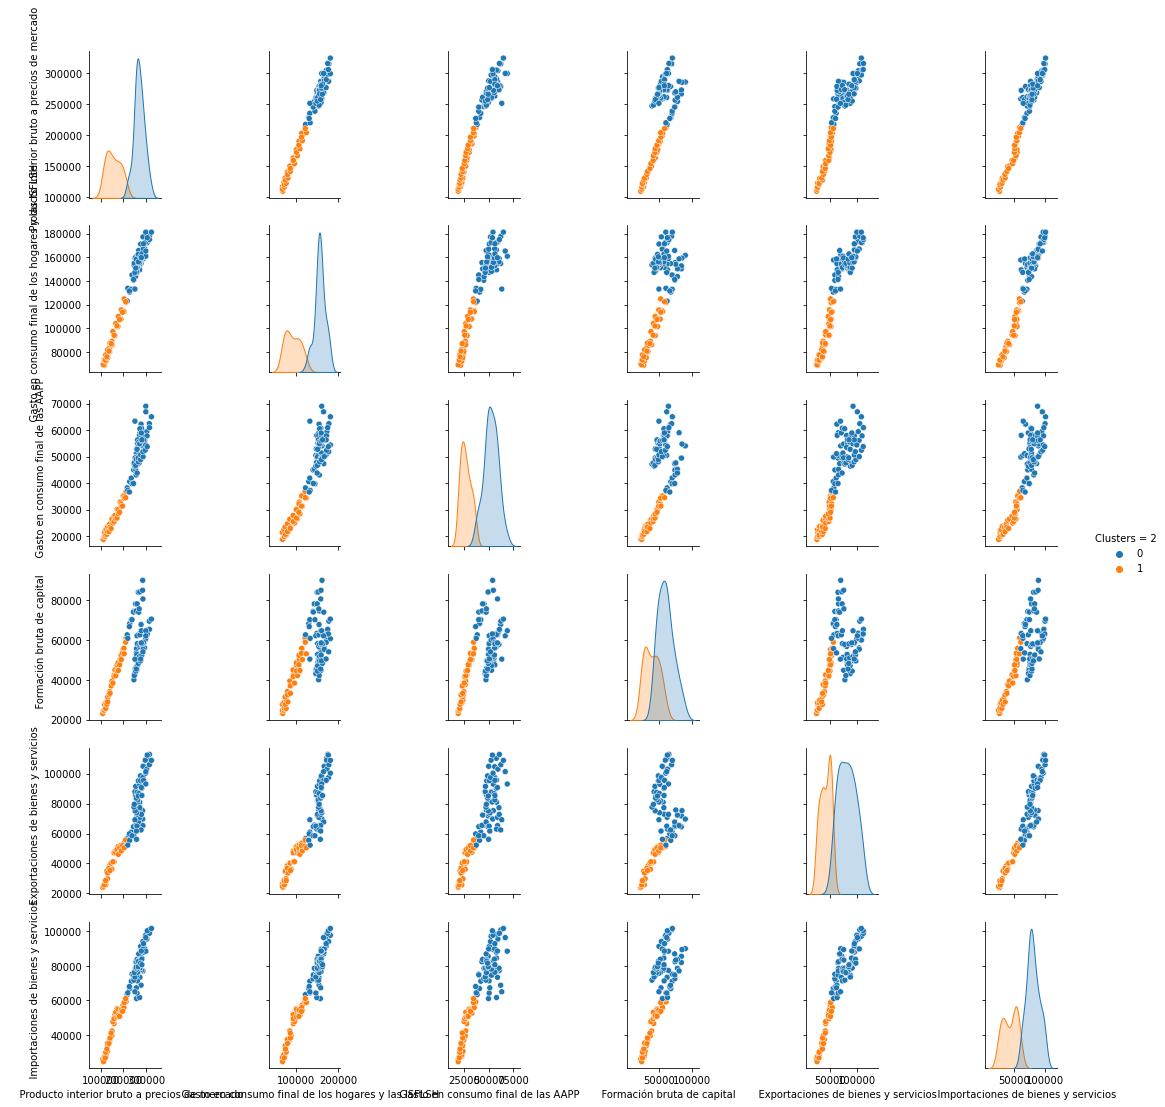

In [22]:
sns.pairplot(df_2clusters, hue= "Clusters = 2", palette ='tab10')

In [23]:
#cuanto mas bajo el davies mejor esta hecho el cluster

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans.labels_)

0.5627896979556697

In [24]:
#EL MEJOR VALOR ES 1 Y EL PEOR -1 
#VALORES CERCANOS A 0 SIGNIFICA QUE LOS CLUSTERS SE SOLAPAN
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.60009806842798

In [25]:
# PROBAMOS COMO RESULTA CON 5 CLUSTERS

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.labels_


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0])

In [26]:
#cuanto mas bajo el davies mejor esta hecho el cluster

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans.labels_)

0.7128033101988313

In [27]:
#EL MEJOR VALOR ES 1 Y EL PEOR -1 
#VALORES CERCANOS A 0 SIGNIFICA QUE LOS CLUSTERS SE SOLAPAN
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.4730477838416057

De acuerdo a los resultados de los indices de desempeño de los clusters, el modelo con dos agrupaciones es el mejor, veamos si los resultados de estacionariedad y el restante analisis teorico de la serie mejora.

## Metodología Box Jenkins

In [28]:
df[df["Clusters = 2"] == 1]

,Año/Trimestre,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios,Clusters = 2
0,1995T1,109165,69638,18762,23075,23894,26204,1
1,1995T2,116633,68678,21271,27616,26209,27141,1
2,1995T3,112398,69078,18687,24542,24721,24630,1
3,1995T4,122392,73512,22407,28486,25709,27722,1
4,1996T1,115776,73098,19699,24743,25705,27469,1
5,1996T2,123286,72202,22440,28522,28788,28666,1
6,1996T3,120174,73097,19797,25698,28403,26821,1
7,1996T4,129967,77408,23612,29770,29779,30602,1
8,1997T1,121938,77542,20318,25638,28553,30113,1
9,1997T2,130471,75045,23356,31385,34519,33834,1


C:\Users\leona\AppData\Local\Temp/ipykernel_8560/4159219517.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


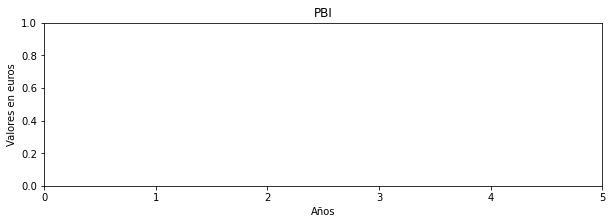

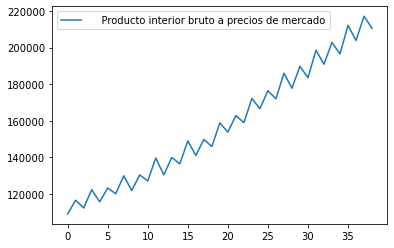

In [29]:
producto = df.iloc[:39,1:2]

fig, ax1 = plt.subplots(figsize=(10,3))
serie_cluster1 = producto
serie_cluster1.index= producto.index
labels =serie_cluster1.index
ax1.set_title("PBI") #titulo
ax1.set_xlabel('Años') #nombre del eje x
ax1.set_ylabel('Valores en euros') #nombre del eje y
ax1.set_xticklabels(labels)
serie_cluster1.plot()
#plt.savefig("SERIE.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

In [30]:
producto

,Producto interior bruto a precios de mercado
0,109165
1,116633
2,112398
3,122392
4,115776
5,123286
6,120174
7,129967
8,121938
9,130471


<Figure size 36000x7200 with 0 Axes>

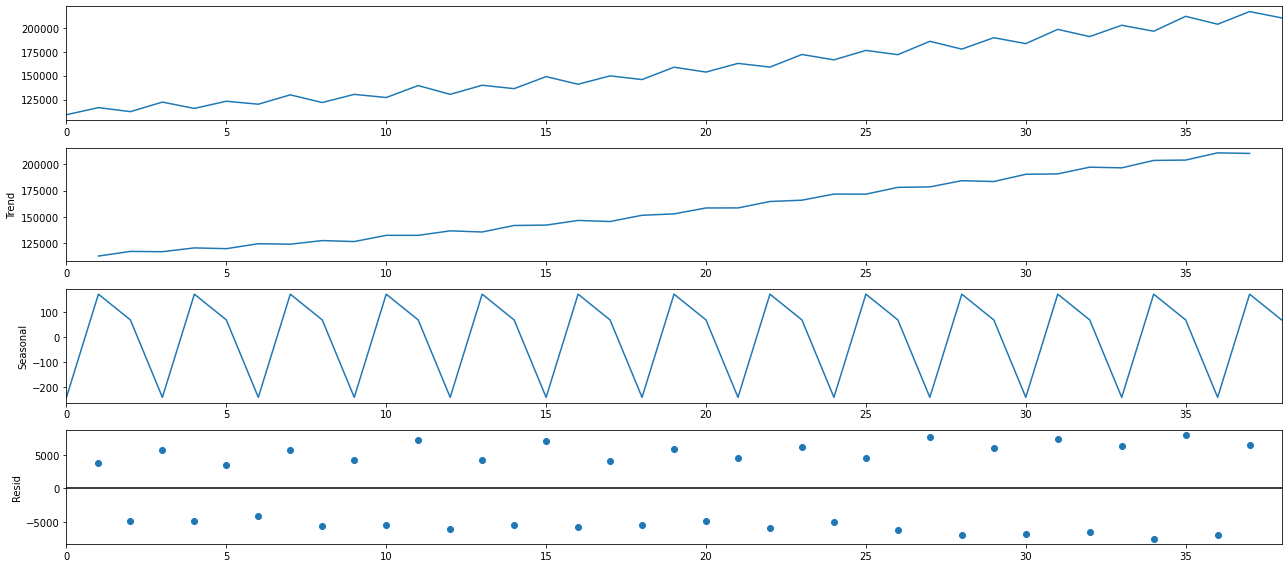

In [31]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize = (500,100))
decomposition = sm.tsa.seasonal_decompose(producto,model = "additive", period = 3)

figura = decomposition.plot()
plt.savefig("SERIE España.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()


## 1) Análisis Teórico de Estacionalidad

## Test ADF - Cluster 1

In [32]:
# Test ADF

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(producto, maxlag = 12, regression = "ct") #agregamos constante y tendencia
print('Estadistico ', resultado[0])
print('p-valor ', resultado[1])
print('Valores Criticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico  -1.933890505760869
p-valor  0.6369315353804709
Valores Criticos
1% -4.262944107465843
5% -3.553092543339733
10% -3.2096284957008097


La serie no es estacionaria

In [33]:
# Aplicacion de logaritmo para corregir la variabilidad de la serie

producto_log_cluster1 = np.log(producto)

#Armo un dataframe con los valores del logaritmo del producto
df_log_cluster1 = pd.DataFrame(producto_log_cluster1)
df_log_cluster1

,Producto interior bruto a precios de mercado
0,11.600616
1,11.666788
2,11.629801
3,11.714984
4,11.659413
5,11.722262
6,11.696696
7,11.775036
8,11.711268
9,11.778906


In [34]:
# Test ADF

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log_cluster1, maxlag = 12, regression = "ct")
print('Estadistico ', resultado[0])
print('p-valor ', resultado[1])
print('Valores Criticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico  -2.50795470921949
p-valor  0.32399670878581577
Valores Criticos
1% -4.356652259899864
5% -3.595299990896677
10% -3.233575694128357


Al caer el estadistico de prueba dentro de la zona de aceptación de la hipotesis nula, se puede tiene evidencia significativa que la serie NO es estacionaria.

As the test statistic falls within the acceptance zone of the null hypothesis, it is possible to have significant evidence that the series is NOT stationary.

## Intentamos arreglar la estacionariedad


## Diferenciamos una vez

<AxesSubplot:>

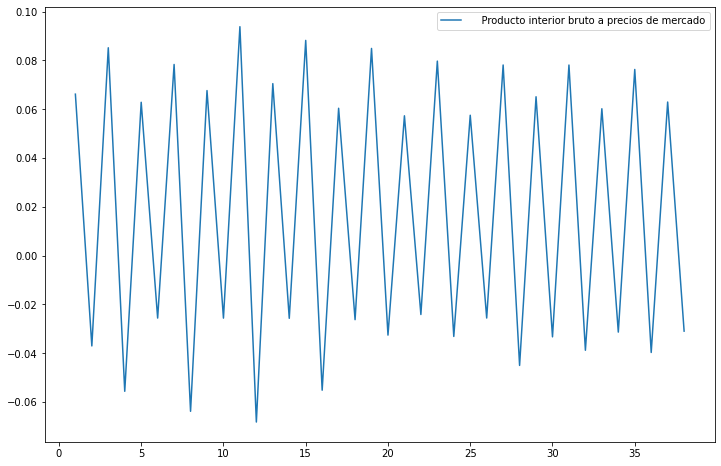

In [35]:
producto_diff1_c1 = df_log_cluster1 - df_log_cluster1 .shift(1)
producto_diff1_c1.dropna().plot(figsize=(12,8))

Hacemos el test ADF nuevamente para chequear estacionariedad.

ADF test again to check stacionarity.

In [36]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(producto_diff1_c1.dropna(), maxlag = 12, regression = "ct")
print('Estadistico ', resultado[0])
print('p-valor ', resultado[1])
print('Valores Criticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico  -1.8838042664930517
p-valor  0.663019650604044
Valores Criticos
1% -4.262944107465843
5% -3.553092543339733
10% -3.2096284957008097


Continua siendo no estacionaria, veamos si agregando, ademas de la constante una tendencia linear y cuadrática.

In [37]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(producto_diff1_c1.dropna(), maxlag = 12, regression = "ctt") #agregamos tendencia cuadratica
print('Estadistico ', resultado[0])
print('p-valor ', resultado[1])
print('Valores Criticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico  -3.905025111943928
p-valor  0.041116222915812656
Valores Criticos
1% -4.751443764502341
5% -4.019901021778954
10% -3.66709112660289


Ahora si la serie es estacionaria ya que el estadistico de prueba cae dentro de la zona de rechazo de Ho.

## Test ADF - Cluster2

In [38]:
df[df["Clusters = 2"] == 0]

,Año/Trimestre,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios,Clusters = 2
37,2004T2,217083,122902,38198,62686,56725,63428,0
39,2004T4,228041,130528,40570,68321,55496,66874,0
40,2005T1,219751,133736,37236,60916,52282,64419,0
41,2005T2,235008,132925,41901,70321,60996,71135,0
42,2005T3,226691,131507,36622,66833,59807,68078,0
...,...,...,...,...,...,...,...,...
101,2020T2,251187,133094,63429,50439,69256,65031,0
102,2020T3,282149,162792,56383,58131,85498,80655,0
103,2020T4,299307,160817,69091,64717,93177,88495,0
104,2021T1,279459,159617,58975,58631,90843,88607,0


C:\Users\leona\AppData\Local\Temp/ipykernel_8560/2026743281.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


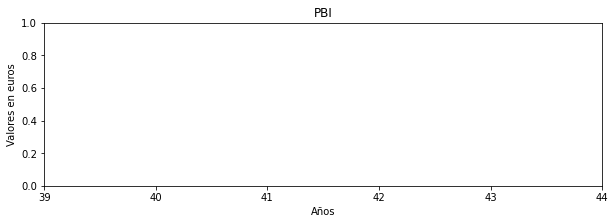

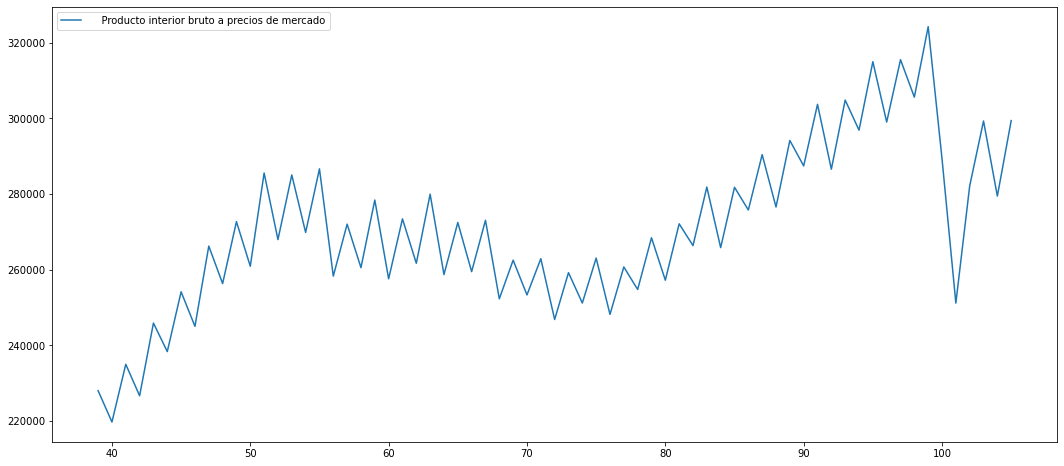

In [39]:
producto2 = df.iloc[39:,1:2]

fig, ax1 = plt.subplots(figsize=(10,3))
serie_cluster2 = producto2
serie_cluster2.index= producto2.index
labels =serie_cluster2.index
ax1.set_title("PBI") #titulo
ax1.set_xlabel('Años') #nombre del eje x
ax1.set_ylabel('Valores en euros') #nombre del eje y
ax1.set_xticklabels(labels)
serie_cluster2.plot()
#plt.savefig("SERIE.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

<Figure size 36000x7200 with 0 Axes>

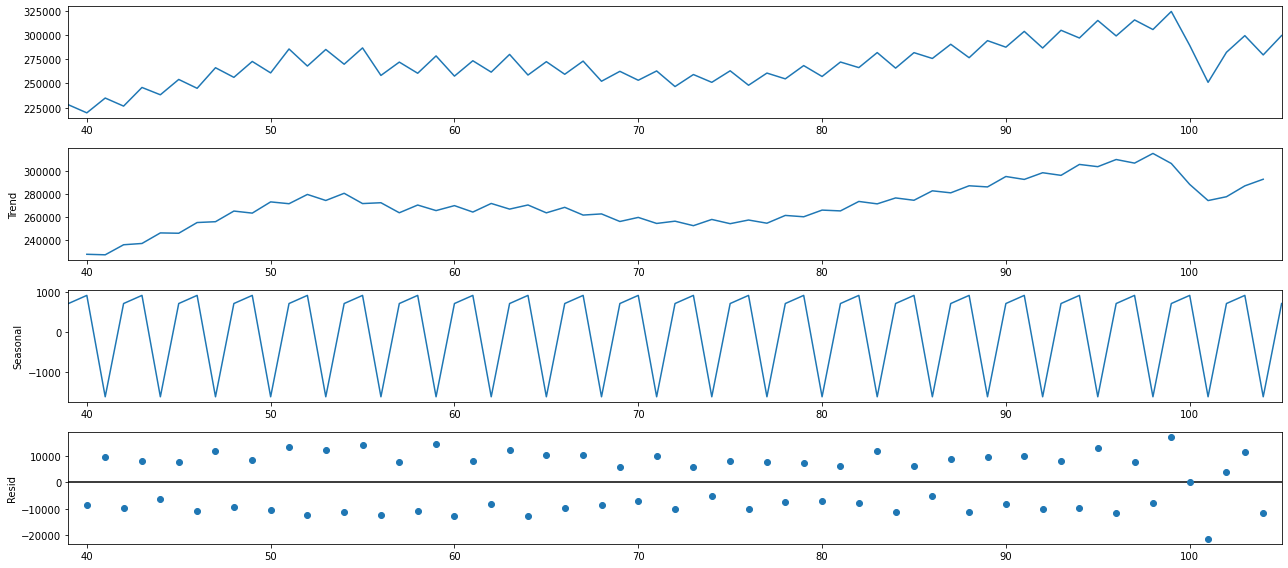

In [40]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize = (500,100))
decomposition = sm.tsa.seasonal_decompose(producto2,model = "additive", period = 3)

figura = decomposition.plot()
plt.savefig("SERIE España Cluster2.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

In [41]:
# Test ADF

from statsmodels.tsa.stattools import adfuller
resultado2 = adfuller(producto2, maxlag = 12, regression = "ct") #agregamos constante y tendencia
print('Estadistico ', resultado[0])
print('p-valor ', resultado[1])
print('Valores Criticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico  -3.905025111943928
p-valor  0.041116222915812656
Valores Criticos
1% -4.751443764502341
5% -4.019901021778954
10% -3.66709112660289


El estadistico de prueba no cae dentro de la zona de rechazo de Ho con lo cual el cluster 2 no es estacionario.


In [42]:
#Aplicamos logaritmo para corregir la estacionariedad

producto_log_cluster2 =np.log(producto2)

#Armo un dataframe con los valores en logaritmo

df_log_cluster2 = pd.DataFrame(producto_log_cluster2)
df_log_cluster2

#TEST ADF

from statsmodels.tsa.stattools import adfuller
resultado2 = adfuller(df_log_cluster2, maxlag = 12, regression = "ct") #agregamos constante y tendencia
print('Estadistico ', resultado[0])
print('p-valor ', resultado[1])
print('Valores Criticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico  -3.905025111943928
p-valor  0.041116222915812656
Valores Criticos
1% -4.751443764502341
5% -4.019901021778954
10% -3.66709112660289


Al caer el estadistico dentro de la zona de rechazo de Ho la serie es estacionaria.

Cómo sólo nos interesa predecir valores futuros, dejaremos de lado la serie correspondiente a los años 1995 - 2004 y trabajaremos con la más actual.

## 2) Identificación de Modelo a Aplicar

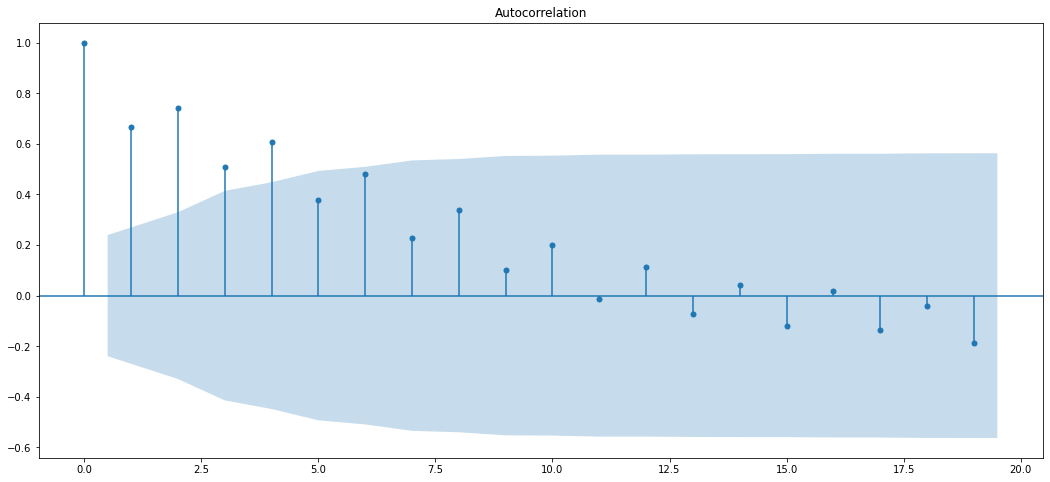

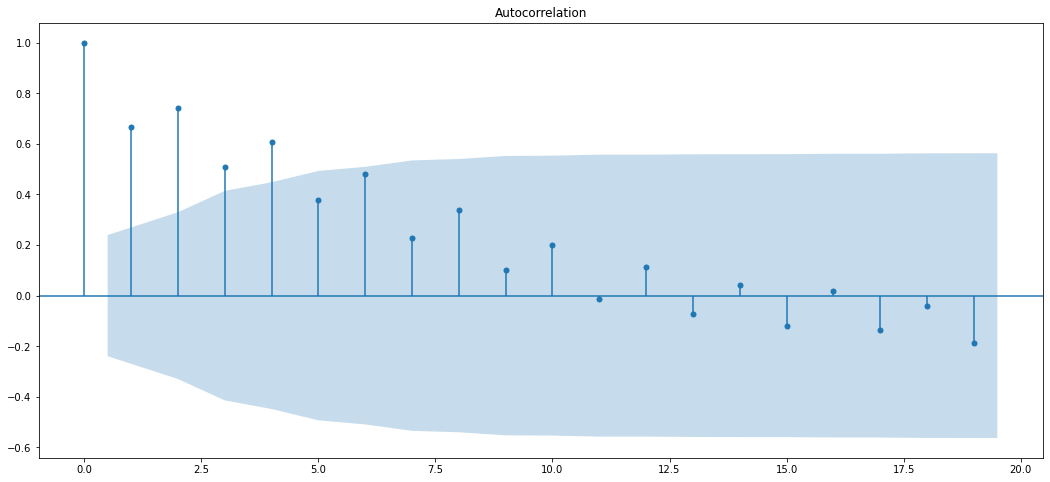

In [43]:
#AUTOCORRELACION

sm.graphics.tsa.plot_acf(producto_log_cluster2)

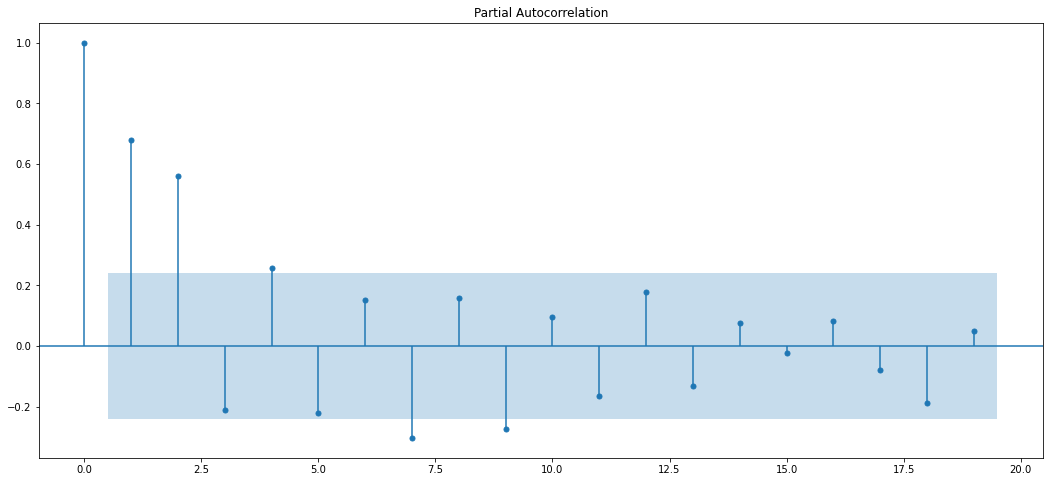

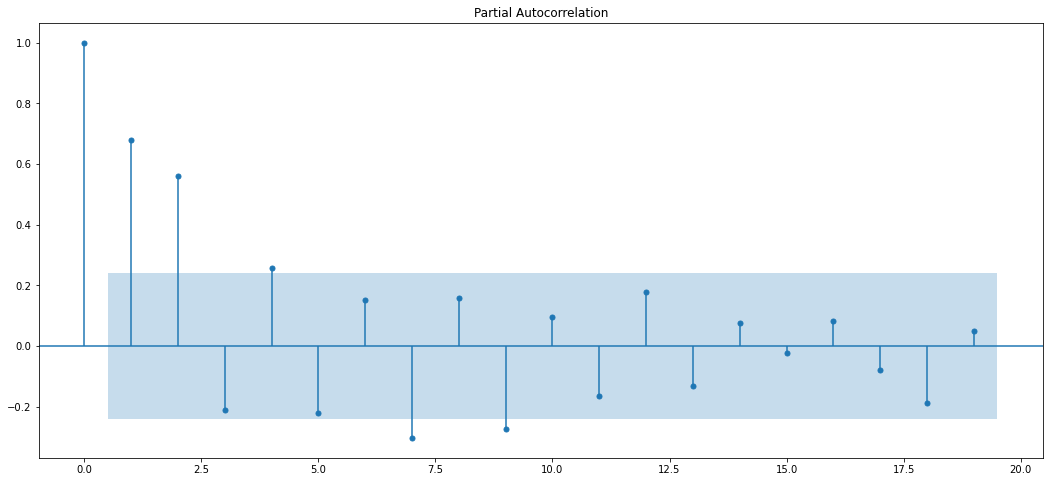

In [44]:
#ATUOCORRELACION PARCIAL

sm.graphics.tsa.plot_pacf(producto_log_cluster2)

A partir de los gráficos podemos ver que estamos en presencia de un proceso de tipo AR.

## 3) Estimación

In [45]:
mod = sm.tsa.statespace.SARIMAX(producto_log_cluster2,
                                order = (1,0,0),
                                trend=('ct'), #tendencia e intercepto de la serie
                            seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

                                              SARIMAX Results                                               
Dep. Variable:         Producto interior bruto a precios de mercado   No. Observations:                   67
Model:                                             SARIMAX(1, 0, 0)   Log Likelihood                 102.305
Date:                                              Wed, 10 Nov 2021   AIC                           -196.610
Time:                                                      11:20:45   BIC                           -187.851
Sample:                                                           0   HQIC                          -193.149
                                                               - 67                                         
Covariance Type:                                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

C:\Users\leona\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


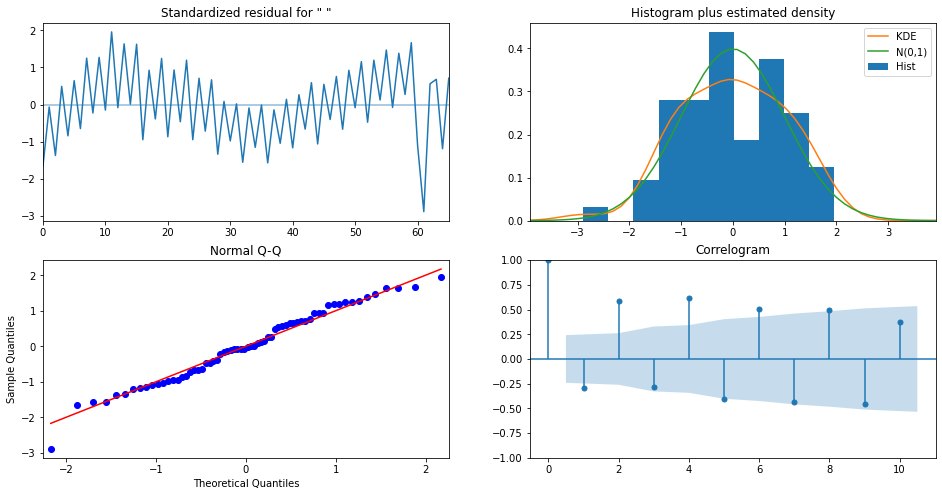

In [46]:
print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
#plt.savefig("Salida-PBI.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

## 4) Verificación

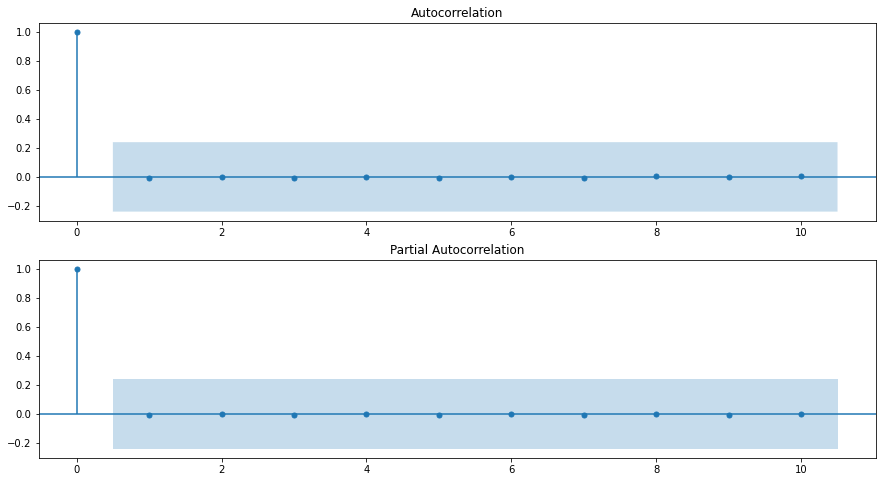

In [47]:
residuos = results.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(residuos, lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuos, lags=10, ax=ax[1])
plt.show()

Se verifica que los residuos son ruido blanco. 

Ademas el coeficiente de L.Box es mayor al p-valor (0.05) con lo cual hay evidencia estadistica para asegurar que los residuos son independientes y se encuentran identicamente distribuidos.-

## Pronóstico

In [48]:
pred = results.get_forecast(2) #forecast para los próximos dos trimestres
pred.predicted_mean

106    12.605004
107    12.604496
Name: predicted_mean, dtype: float64

In [49]:
#intervalo de valores predichos
print(pred.summary_frame())

    Producto interior bruto a precios de mercado       mean   mean_se  \
106                                               12.605004  0.051354   
107                                               12.604496  0.056132   

    Producto interior bruto a precios de mercado  mean_ci_lower  mean_ci_upper  
106                                                   12.504352      12.705656  
107                                                   12.494479      12.714513  


In [50]:
serie_predicha = results.get_prediction().predicted_mean

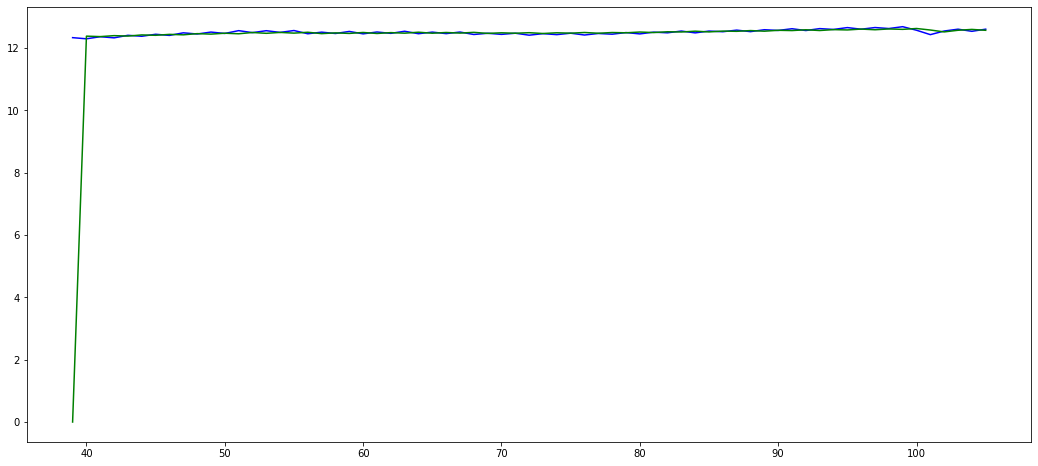

In [51]:
plt.plot(producto_log_cluster2 , color ="Blue") #Valor real
plt.plot(serie_predicha, color ="Green") #Predicción
plt.savefig("Resultado PBI vs real.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

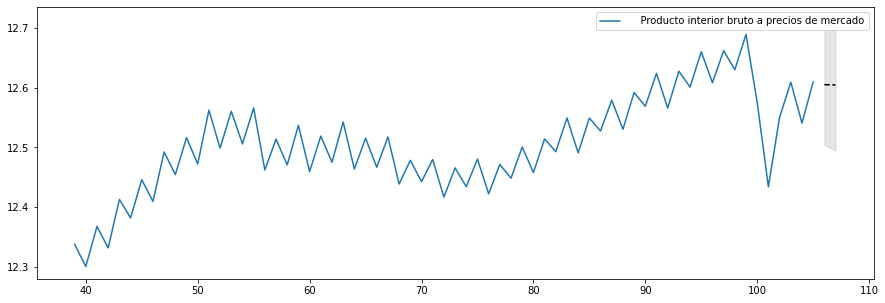

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
producto_log_cluster2.plot(ax=ax)

# Construct the forecasts
fcst = pred.summary_frame()
fcst['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcst.index, fcst['mean_ci_lower'], fcst['mean_ci_upper'], color='k', alpha=0.1);

In [53]:
#ERROR CUADRADO MEDIO
#diferencia absoluta promedio entre la serie real y la predicha
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(producto_log_cluster2, serie_predicha))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.508


In [54]:
#MAE: ERROR ABSOLUTO MEDIO
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(producto_log_cluster2, serie_predicha)
print('MAE: %.3f' % mae)

MAE: 0.226


In [55]:
#ERROR EN PORCENTAJE DE LA MEDIA DE LOS ERRORES
def SMAPE (forecast, actual):
    """Returns the Symmetric Mean Absolute Percentage Error between two Series"""
    masked_arr = ~((forecast==0)&(actual==0))
    diff = abs(forecast[masked_arr] - actual[masked_arr])
    avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')
    return sum(diff/avg)/len(forecast) * 100

In [56]:
SMAPE(serie_predicha, producto_log_cluster2.iloc[:,0])

SMAPE Error Score: 3.32 %


3.3171176643948175